#### This Notebook will cover one of the most efficient algorithm for spam mails classification i.e using Navie Bayes Classification

#### Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

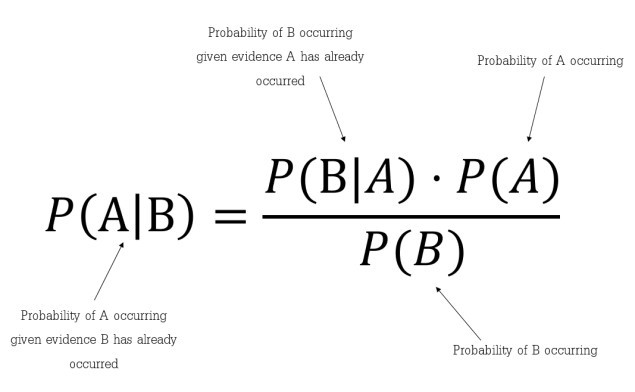

#### The Dataset is downloaded from : 

#### The messages are simple uncleaned strings with combinations of text and HTML tags.

#### Method used : CountVectorizer from sklearn to clean messages
                   1)Tokenizing
                   2)Removing Stop words
                   3)Vectorizing

####                         Algorithm: MultinomialNB

In [1]:
#### Dataset for raw text mails : https://www.kaggle.com/chandramoulinaidu/spam-classification-for-basic-nlp

In [2]:
!pip install bs4

     |████████████████████████████████| 115 kB 410 kB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=7dc240770f87ecd84e9205ba9cc187cff10393a57aa40ad04acc3ddfb2645878
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [3]:
# Importing the packages

import pandas as pd
import numpy as np
import operator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

from wordcloud import WordCloud
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score, precision_score, f1_score

In [4]:
data = pd.read_csv('../input/spam-classification-for-basic-nlp/Spam Email raw text for NLP.csv')

In [5]:
data.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [6]:
data.to_csv("Spam Email raw text for NLP.csv",index=False)

In [7]:
data.shape

(5796, 3)

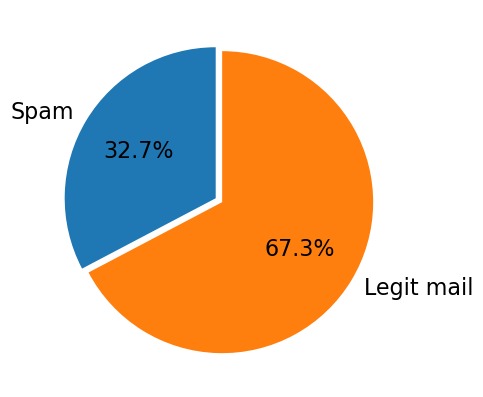

In [8]:
# Lets check % of spam and non spam messages
category_names = ['Spam',"Legit mail"]
size = [data.CATEGORY.value_counts()[1],data.CATEGORY.value_counts()[0]]

# Pie chart 
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

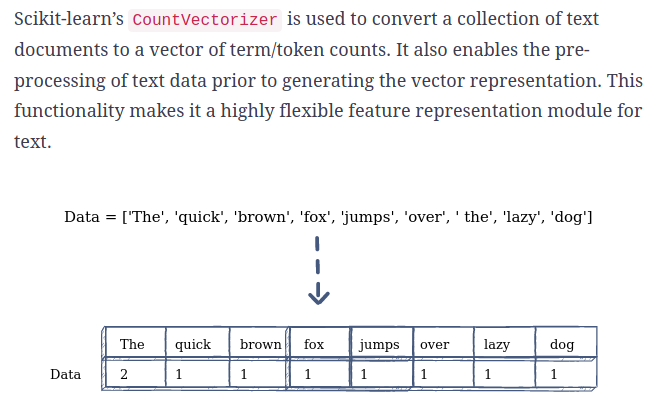

In [9]:
vectorizer = CountVectorizer(stop_words = 'english')

In [10]:
# Fitting the text messages to vectorizer give a sparse matrix

all_features = vectorizer.fit_transform(data['MESSAGE'])

In [11]:
type(all_features)

scipy.sparse.csr.csr_matrix

In [12]:
all_features.shape

(5796, 102694)

In [13]:
# Vectorizer has attribute .vocabulary_ which stores the cout of words from the entire message feature of data df
vocab_dict = vectorizer.vocabulary_

In [14]:
#### For Plotting word cloud we need all words combined from all the messages in the data, using Snowball stemmer,
#### html parser and tokenizing inside below fn to generate require words

In [15]:
def clean_message(message, stemmer=SnowballStemmer("english"), stop_words=stopwords.words("english")):
    
    #Removing HTML tags:
    soup = BeautifulSoup(message, "html.parser")
    cleaned_text = soup.get_text()
    
    #Coverting to Lower Case and Tokenising
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words =[]
    
    for word in words:
        # Stemming and removing Punctuation 
        if word not in stop_words and word.isalpha():
            stemmed_word = stemmer.stem(word)
            filtered_words.append(stemmed_word)
    
    return filtered_words

In [16]:
%%time

nested_list = data.MESSAGE.apply(clean_message)
all_words = [item for sublist in nested_list for item in sublist]

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:424: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


CPU times: user 54.6 s, sys: 87.3 ms, total: 54.6 s
Wall time: 54.7 s


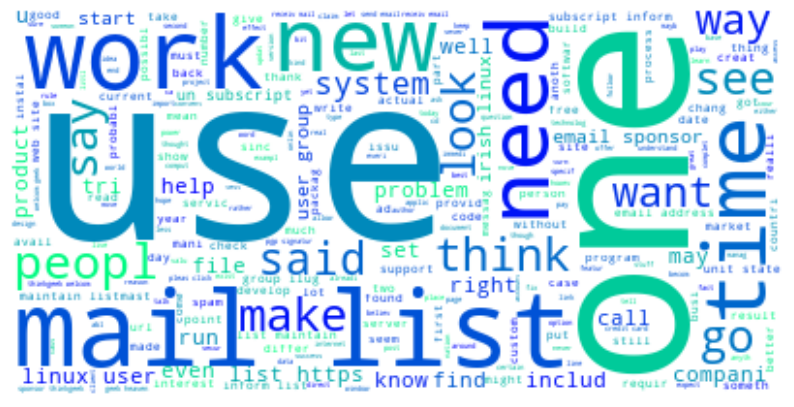

In [17]:
normal_cloud = WordCloud(background_color="white", max_words=500, colormap='winter')
normal_cloud.generate(" ".join(all_words))
plt.figure(figsize=(10,8), dpi=100)
plt.imshow(normal_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
#### MultinomialNB model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(all_features, data.CATEGORY, test_size=0.30, random_state=88)

In [20]:
X_train.shape, X_test.shape

((4057, 102694), (1739, 102694))

In [21]:
classifier = MultinomialNB()

In [22]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [23]:
yhat = classifier.predict(X_test)

In [24]:
correct_predictions =(yhat == y_test).sum()
incorrect_prediction = X_test.shape[0] - (yhat == y_test).sum()
accuracy = round(correct_predictions/X_test.shape[0],2)

In [25]:
print("Number of documents predicted correctly",correct_predictions )
print("Number of documents predicted correctly", incorrect_prediction)
print("Accuracy is ", accuracy)

Number of documents predicted correctly 1660
Number of documents predicted correctly 79
Accuracy is  0.95


In [26]:
classifier.score(X_test,y_test)

0.9545715928694652

In [27]:
#Checking recall, precision and f1 score for the model

recall_score(y_test,yhat),precision_score(y_test,yhat),f1_score(y_test,yhat)

(0.8646209386281588, 0.9917184265010351, 0.9238187078109932)